# Author - Sumit Kumar (#GRIPJUNE21)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### From the above dataframe we see that there are two columns, those are hours and scores

# Exploratory Data Analysis 

In [3]:
data.shape #To check the shape of our data. There are 25 rows and 2 columns in our dataset

(25, 2)

In [4]:
data.describe() #To see the statistical measure of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking for Missing Values

In [5]:
missing_values = data.isnull().sum()
missing_values

Hours     0
Scores    0
dtype: int64

###### We can see that there are no missing value in the dataset

# Visualizing the distribution of data points through scatterplot

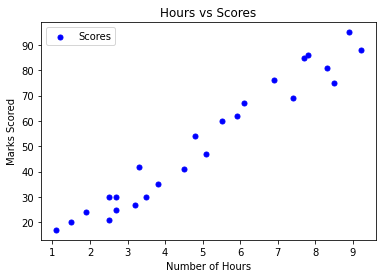

In [6]:
plt.scatter(x=data["Hours"],y=data["Scores"],c="blue",marker="o",s=25,label="Scores")
plt.xlabel("Number of Hours")
plt.ylabel("Marks Scored")
plt.title("Hours vs Scores")

plt.legend()

**We can see from the graph above that there is a positive linear relation between the number of hours studied and marks scored.**

# Data Preparation
Dividing data into dependent value and independent variables to apply linear regression

In [7]:
X = data.iloc[:,:-1].values # Independent Variable
Y = data.iloc[:,1].values # Dependent Variable

### Splitting data into training and test datasets

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=12) 

In [9]:
from sklearn.linear_model import LinearRegression  
lin = LinearRegression()  
lin.fit(X_train, Y_train)
lin.score(X_test,Y_test)

0.8897176466006437

###### The above result shows the accuracy of our model on test data

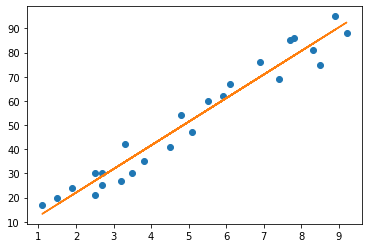

In [10]:
#Fitting Linear line in scatter plot

plt.plot(data["Hours"],data["Scores"],"o")

#Create scatter plot

m,b = np.polyfit(data["Hours"],data["Scores"],1)

#m - slope, b - intercept

plt.plot(data["Hours"],m*data["Hours"]+b)

### Predicting the score

In [11]:
y_pred = lin.predict(X_test) # Predicting the scores
y_pred

array([74.34006527, 55.9949579 , 61.7881497 , 52.13283004, 88.82304477])

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred, 'Error': Y_test-y_pred })  
df 

,Actual,Predicted,Error
0,69,74.340065,-5.340065
1,60,55.994958,4.005042
2,67,61.788150,5.211850
3,47,52.132830,-5.132830
4,95,88.823045,6.176955


In [13]:
# You can also test with your own data
hours = [[9.25]]
pred_score = lin.predict(hours)
print("Score obtained by the student if he studies for 9.25 hours/day" ,pred_score[0])

Score obtained by the student if he studies for 9.25 hours/day 92.2024066507085


### Model Evaluation

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 5.173348586293498
Mean Squared Error: 27.244152583776987
Root Mean Squared Error: 5.2195931435100364
